Copyright 2022 Andrew M. Olney and made available under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0) for text and [Apache-2.0](http://www.apache.org/licenses/LICENSE-2.0) for code.


# Gradient boosting: Problem solving


This session will use a dataset of video game sales for games that sold at least 100,000 copies.
Because the dataset is so large, only 1000 randomly sampled rows are included.

| Variable     | Type    | Description                                                                                 |
|:--------------|:---------|:---------------------------------------------------------------------------------------------|
| Rank         | Interval   | Ranking of overall sales                                                                    |
| Name         | Nominal   | The games name                                                                              |
| Platform     | Nominal   | Platform of the games release (i.e. PC,PS4, etc.)                                           |
| Year         | Ratio   | Year of the game's release                                                                  |
| Genre        | Nominal   | Genre of the game                                                                           |
| Publisher    | Nominal   | Publisher of the game                                                                       |
| NA_Sales     | Ratio   | Sales in North America (in millions)                                                        |
| EU_Sales     | Ratio   | Sales in Europe (in millions)                                                               |
| JP_Sales     | Ratio   | Sales in Japan (in millions)                                                                |
| Other_Sales  | Ratio   | Sales in the rest of the world (in millions)                                                |
| Global_Sales | Ratio   | Total worldwide sales.                                                                      |

<div style="text-align:center;font-size: smaller">
    <b>Source:</b> This dataset was taken from <a href="https://www.kaggle.com/gregorut/videogamesales">Kaggle</a>.
</div>
<br>

The goal is to predict `Global_Sales` using the other non-sales variables in the data.


## Load data

Load `readr`, `dplyr`, `base`, `tibble`, and `tidyr` for reading data into a dataframe and manipulate it.

In [1]:
library(tibble)
library(readr)
library(dplyr)
library(tidyr)
library(base)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="*W!O}K5r2Yu@@/lAL[6;">tibble</variable><variable id="_;PP-/]_2fNUR.dyhw(8">readr</variable><variable id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</variable><variable id="%ovw[;dNkqx,|V0M/RZA">tidyr</variable><variable id="6C!l+@S8,SvtzakmsxQD">base</variable></variables><block type="import_R" id="2HxZvWS9]I@wjk;tW}S(" x="44" y="31"><field name="libraryName" id="*W!O}K5r2Yu@@/lAL[6;">tibble</field><next><block type="import_R" id="q]np1Ju|B`4k*R-zylwU"><field name="libraryName" id="_;PP-/]_2fNUR.dyhw(8">readr</field><next><block type="import_R" id="(%@0XC,((6M%4]kj+iDm"><field name="libraryName" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field><next><block type="import_R" id="l.:Sc#tFH?#!tX=Zl.4b"><field name="libraryName" id="%ovw[;dNkqx,|V0M/RZA">tidyr</field><next><block type="import_R" id="7z@-GBqKT`z8r*c)2~;["><field name="libraryName" id="6C!l+@S8,SvtzakmsxQD">base</field></block></next></block></next></block></next></block></next></block></xml>


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Load the dataframe with `datasets/vgsales-1000.csv`

In [45]:
dataframe = readr::read_csv("datasets/vgsales-1000.csv")

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id="_;PP-/]_2fNUR.dyhw(8">readr</variable></variables><block type="variables_set" id="gM*jw`FfIR3)8=g0iEB7" x="19" y="218"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field><value name="VALUE"><block type="varDoMethod_R" id=",vaW{t?FHN1~E?+,h!w-"><mutation items="1"></mutation><field name="VAR" id="_;PP-/]_2fNUR.dyhw(8">readr</field><field name="MEMBER">read_csv</field><data>readr:read_csv</data><value name="ADD0"><block type="text" id="dfrpI5b@DHr+DQ:|@vpv"><field name="TEXT">datasets/vgsales-1000.csv</field></block></value></block></value></block><block type="variables_get" id="dn{+Q#DO%lN;G_tFGJ#B" x="8" y="304"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></xml>

Rows: 1000 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Name, Platform, Year, Genre, Publisher
dbl (6): Rank, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
9916,Backyard Wrestling 2: There Goes the Neighborhood,XB,2004,Fighting,Eidos Interactive,0.09,0.03,0.00,0.00,0.12
11035,Cardfight!! Vanguard: Ride to Victory,3DS,2013,Misc,FuRyu,0.00,0.00,0.09,0.00,0.09
12779,Gold and Glory: The Road to El Dorado,PS,2000,Adventure,Ubisoft,0.03,0.02,0.00,0.00,0.06
15552,Miyako,PSP,2010,Adventure,Idea Factory,0.00,0.00,0.02,0.00,0.02
7731,Zombie Army Trilogy,PS4,2015,Shooter,Rebellion Developments,0.04,0.12,0.00,0.03,0.20
10477,Yu-Gi-Oh! 5D's Wheelie Breakers,Wii,2009,Racing,Konami Digital Entertainment,0.09,0.01,0.00,0.01,0.10
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
3803,Bulletstorm,PS3,2011,Shooter,Electronic Arts,0.23,0.20,0.01,0.08,0.53


## Explore data

Load `ggplot2`, `psych`, `corrr`, and `GGally` for exploring the data.

In [46]:
library(corrr)
library(GGally)
library(ggplot2)
library(psych)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id=":}mQPTQxRKZMh,T7NR$$">corrr</variable><variable id=",xJ=qt0#Ig7$`IzNRoL:">GGally</variable><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable><variable id="-%rFagMkPz%VG@$q~ANP">psych</variable></variables><block type="import_R" id="fvM{-l%xz0![2.n:2Hoj" x="-86" y="-4"><field name="libraryName" id=":}mQPTQxRKZMh,T7NR$$">corrr</field><next><block type="import_R" id="*VxvMC/-.UEwASPz(/;T"><field name="libraryName" id=",xJ=qt0#Ig7$`IzNRoL:">GGally</field><next><block type="import_R" id="n?whQI8t]Qj6)k-ny|GN"><field name="libraryName" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><next><block type="import_R" id="P-VMU%%i=n!?0`h3v|jE"><field name="libraryName" id="-%rFagMkPz%VG@$q~ANP">psych</field></block></next></block></next></block></next></block></xml>

### Describe and drop missing

Use `summary` on the data and check for NA.

In [7]:
base::summary(dataframe)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="6C!l+@S8,SvtzakmsxQD">base</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable></variables><block type="varDoMethod_R" id="LT2D`/HmZckO6/6/FGbS" x="-236" y="117"><mutation items="1"></mutation><field name="VAR" id="6C!l+@S8,SvtzakmsxQD">base</field><field name="MEMBER">summary</field><data>base:summary</data><value name="ADD0"><block type="variables_get" id="sQj_H?[#0_@MCeUCk!SK"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value></block></xml>

      Rank           Name             Platform             Year          
 Min.   :    7   Length:1000        Length:1000        Length:1000       
 1st Qu.: 3890   Class :character   Class :character   Class :character  
 Median : 7744   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 8003                                                           
 3rd Qu.:12056                                                           
 Max.   :16598                                                           
    Genre            Publisher            NA_Sales          EU_Sales     
 Length:1000        Length:1000        Min.   : 0.0000   Min.   :0.0000  
 Class :character   Class :character   1st Qu.: 0.0000   1st Qu.:0.0000  
 Mode  :character   Mode  :character   Median : 0.0800   Median :0.0300  
                                       Mean   : 0.3032   Mean   :0.1728  
                                       3rd Qu.: 0.2500   3rd Qu.:0.1200  
                                      

-----------
**QUESTION:**

How many rows had missing values?

**ANSWER: (click here to edit)**

*None, there are no NA.*

--------------------

**QUESTION:**

Does the min/mean/max of each variable make sense to you?

**ANSWER: (click here to edit)**

*They make sense - except `Year`, which should not be a character. Some sales are zero, but that's probably OK - rounded down to zero.
Looks like the ranks are from the original dataset because they go above 1000.*

--------------------

Find the distinct values in `Year` using `dplyr::distinct`. Use `vector` so you can see them all.

In [31]:
unlist(dataframe %>%
    dplyr::select(Year) %>%
    dplyr::distinct(), use.names = FALSE)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</variable></variables><block type="unlistBlock_R" id="./d_v[RbbtAkwlj*@dcQ" x="-186" y="96"><value name="LIST"><block type="pipe_R" id="-iCEhX^rhQn*Z.ck{qRw"><mutation items="2"></mutation><value name="INPUT"><block type="variables_get" id="=gJP]7%ho#qxNX]uS2$4"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="LwHz.7F]PF[T`u=*P/kf"><mutation items="1"></mutation><field name="VAR" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field><field name="MEMBER">select</field><data>dplyr:select</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="tJ17qzrw+@IW#g;^3=ru"><field name="CODE">Year</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="ZzfUkB3c.wMbat]PWrG("><mutation items="1"></mutation><field name="VAR" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field><field name="MEMBER">distinct</field><data>dplyr:distinct</data></block></value></block></value></block></xml>

[1] "2008" "2004" "2013" "2000" "2010" "2015" "2009" "2014" "2005" "2001"
[11] "2012" "2006" "2011" "2003" "1990" "2002" "N/A"  "1997" "2016" "1994"
[21] "2007" "1999" "1998" "1989" "1981" "1995" "1996" "1992" "1993" "1986"
[31] "1991" "1983" "1987" "1985"

-----------
**QUESTION:**

What problem has been revealed?

**ANSWER: (click here to edit)**

*Year has N/A, which R does not recognize as NA. We should replace all N/A in the data with NA.*

--------------------

Update the dataframe with the following:

- Convert all the "N/A" to NA 
- Drop NA from the dataframe
- Convert `Year` to numeric using `as.numeric`

Display the result.

*Hint: use `dplyr::mutate(across(everything(),~na_if(., "N/A")))`*

In [47]:
dataframe = dataframe %>%
    dplyr::mutate(across(everything(),~na_if(., "N/A"))) %>%
    tidyr::drop_na() %>%
    dplyr::mutate(Year = as.numeric(Year))

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</variable><variable id="%ovw[;dNkqx,|V0M/RZA">tidyr</variable></variables><block type="variables_set" id="U}D)WNkMN{zkvsv_XMVk" x="-204" y="15"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field><value name="VALUE"><block type="pipe_R" id="]7@2/s(?wg-TyGz=Z:{~"><mutation items="3"></mutation><value name="INPUT"><block type="variables_get" id="G9?1Z$+|f_bB|RY}te%D"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="c^A|CXwtd%=8/8C}W]Fk"><mutation items="1"></mutation><field name="VAR" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field><field name="MEMBER">mutate</field><data>dplyr:mutate</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="qG=eh?D4EH@f,qGBJo=#"><field name="CODE">across(everything(),~na_if(., "N/A"))</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id=":l47,w:xS~:v;f9.}ZQ2"><mutation items="1"></mutation><field name="VAR" id="%ovw[;dNkqx,|V0M/RZA">tidyr</field><field name="MEMBER">drop_na</field><data>tidyr:drop_na</data></block></value><value name="ADD2"><block type="varDoMethod_R" id="s3w0nlUp$.f$)d`=,zWc"><mutation items="1"></mutation><field name="VAR" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field><field name="MEMBER">mutate</field><data>dplyr:mutate</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="e@NFla%HXcSovx6VK}Jj"><field name="CODE">Year = as.numeric(Year)</field></block></value></block></value></block></value></block><block type="variables_get" id="#Eszk7D$*Y;;4kl-~^{p" x="-185" y="202"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></xml>

Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
9916,Backyard Wrestling 2: There Goes the Neighborhood,XB,2004,Fighting,Eidos Interactive,0.09,0.03,0.00,0.00,0.12
11035,Cardfight!! Vanguard: Ride to Victory,3DS,2013,Misc,FuRyu,0.00,0.00,0.09,0.00,0.09
12779,Gold and Glory: The Road to El Dorado,PS,2000,Adventure,Ubisoft,0.03,0.02,0.00,0.00,0.06
15552,Miyako,PSP,2010,Adventure,Idea Factory,0.00,0.00,0.02,0.00,0.02
7731,Zombie Army Trilogy,PS4,2015,Shooter,Rebellion Developments,0.04,0.12,0.00,0.03,0.20
10477,Yu-Gi-Oh! 5D's Wheelie Breakers,Wii,2009,Racing,Konami Digital Entertainment,0.09,0.01,0.00,0.01,0.10
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
3803,Bulletstorm,PS3,2011,Shooter,Electronic Arts,0.23,0.20,0.01,0.08,0.53


### Visualize

Create a correlation matrix heatmap.

Non-numeric variables removed from input: `Name`, `Platform`, `Genre`, and `Publisher`
Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


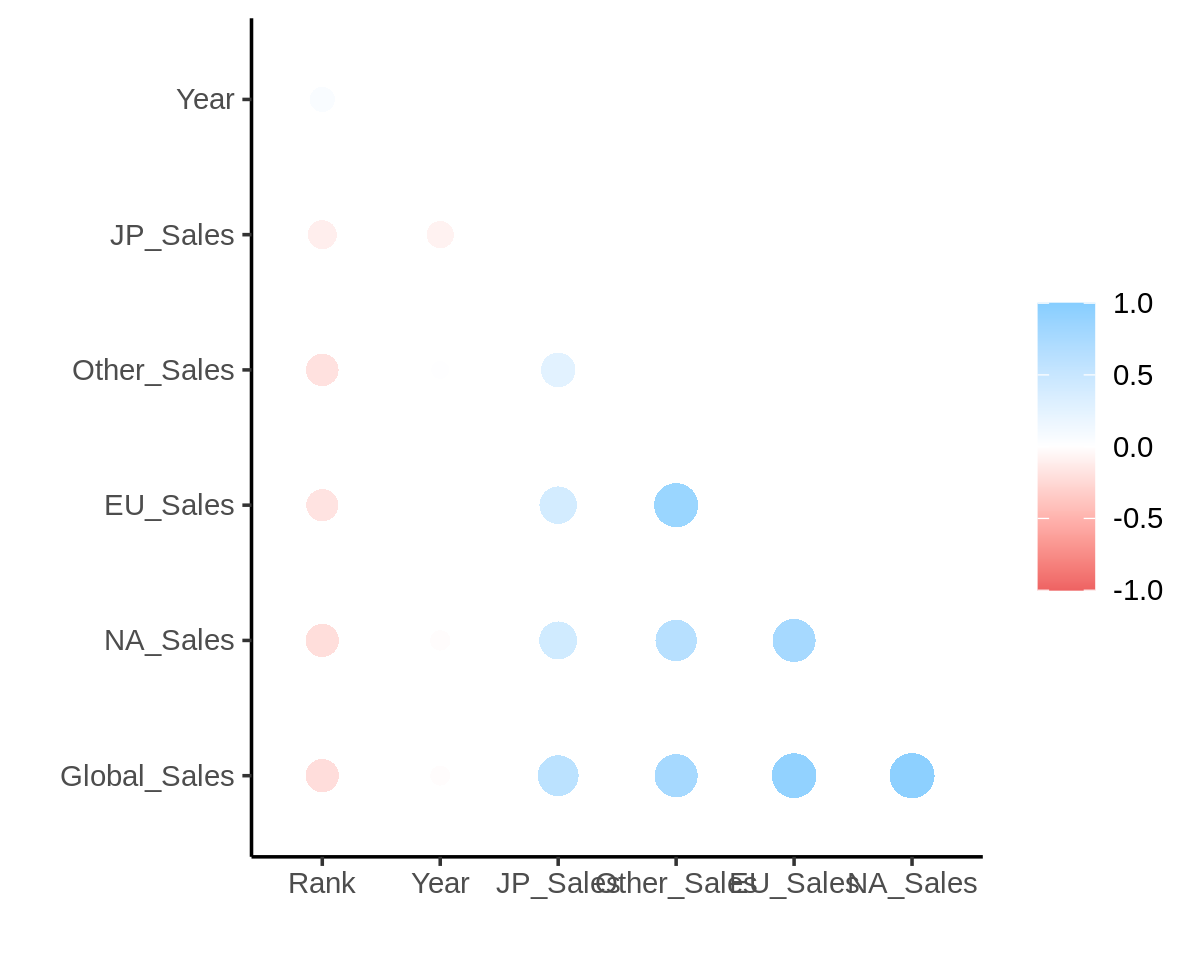

In [35]:
dataframe %>%
    corrr::correlate() %>%
    corrr::rearrange() %>%
    corrr::shave() %>%
    corrr::rplot()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id=":}mQPTQxRKZMh,T7NR$$">corrr</variable></variables><block type="pipe_R" id="I_I!T6Np:-*$EAezokWP" x="-210" y="120"><mutation items="4"></mutation><value name="INPUT"><block type="variables_get" id="_SUi*L[(KA-Dtj{ODao3"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="O3yg#tXKNiJXS_c=,,%*"><mutation items="1"></mutation><field name="VAR" id=":}mQPTQxRKZMh,T7NR$$">corrr</field><field name="MEMBER">correlate</field><data>corrr:correlate</data></block></value><value name="ADD1"><block type="varDoMethod_R" id="N:o{(HMF+%r0u)4{BY?X"><mutation items="1"></mutation><field name="VAR" id=":}mQPTQxRKZMh,T7NR$$">corrr</field><field name="MEMBER">rearrange</field><data>corrr:rearrange</data></block></value><value name="ADD2"><block type="varDoMethod_R" id="qqzXwb2`t9rmVk*Jh$N5"><mutation items="1"></mutation><field name="VAR" id=":}mQPTQxRKZMh,T7NR$$">corrr</field><field name="MEMBER">shave</field><data>corrr:shave</data></block></value><value name="ADD3"><block type="varDoMethod_R" id="|*+}{gZBrCr/F77a[p`U"><mutation items="1"></mutation><field name="VAR" id=":}mQPTQxRKZMh,T7NR$$">corrr</field><field name="MEMBER">rplot</field><data>corrr:rplot</data></block></value></block></xml>

-----------
**QUESTION:**

What's going on with `Rank` and the `*_Sales` variables?

**ANSWER: (click here to edit)**

*Rank appears to be negatively correlated with most things. 
That makes sense because a rank of 1 would have high sales, and a rank of 1000 would have lower sales.
All of the sales seem highly correlated with each other. 
Europe might be doing it's own thing to a small extent.
Basically, we need to remove all other sales data to make a valid model for `Global_Sales`, otherwise we are predicting sales by itself.*

--------------------

Do a scatterplot matrix with with the character variables dropped to see the relationships between the numeric variables. 

*Hint: `-where(is.character)`*

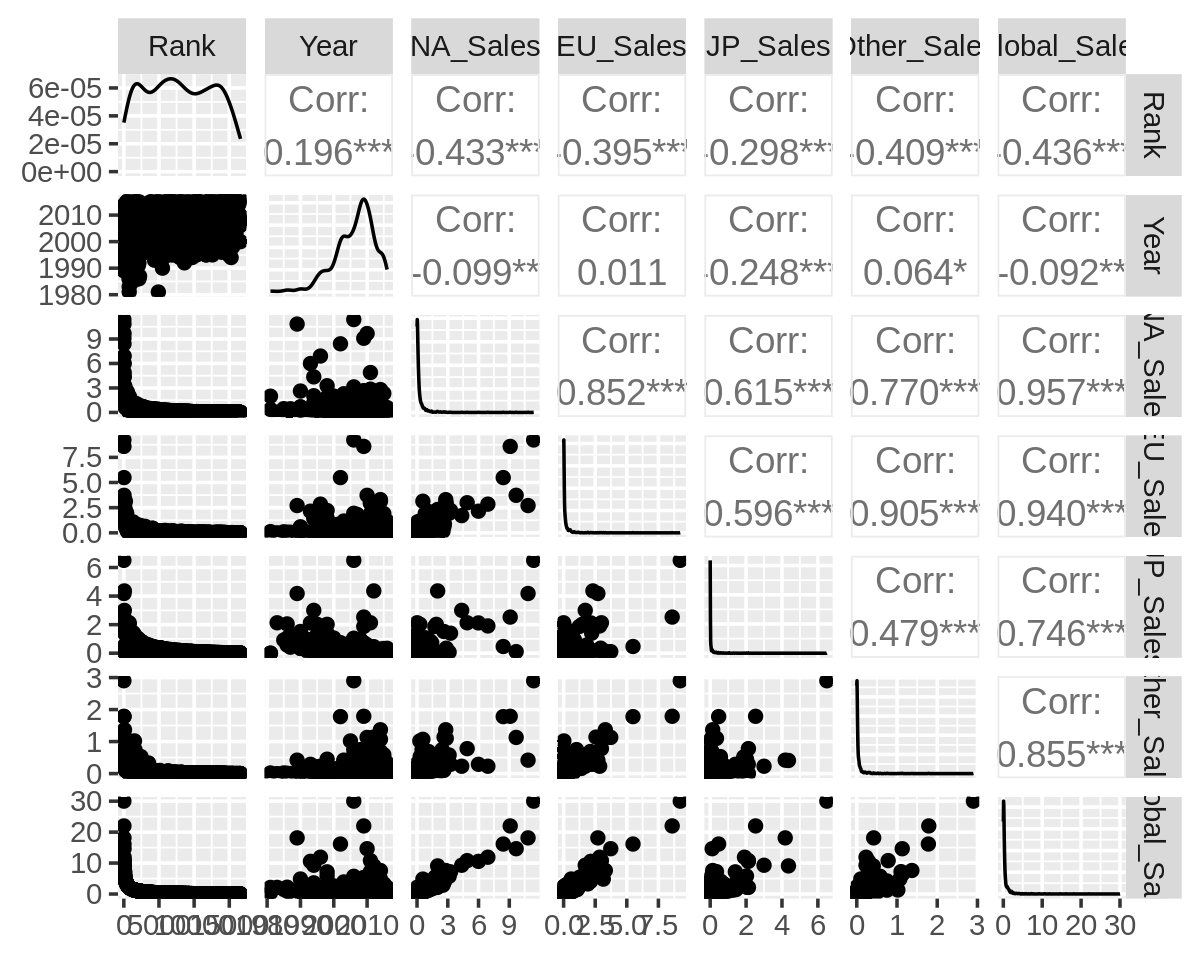

In [38]:
dataframe %>%
    dplyr::select(-where(is.character)) %>%
    GGally::ggpairs()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</variable><variable id=",xJ=qt0#Ig7$`IzNRoL:">GGally</variable></variables><block type="pipe_R" id="}wC%Vv;WrPYG)0o[vPs+" x="-135" y="202"><mutation items="2"></mutation><value name="INPUT"><block type="variables_get" id="z3SLzmZ|CtF.SVlj:D:P"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="W!3b`/^pwM(`5*Mzn:A#"><mutation items="1"></mutation><field name="VAR" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field><field name="MEMBER">select</field><data>dplyr:select</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="4Mc9c8UpH2l?NgD_o8gu"><field name="CODE">-where(is.character)</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="ioP~1S4U+?~Wt=f%+P,+"><mutation items="1"></mutation><field name="VAR" id=",xJ=qt0#Ig7$`IzNRoL:">GGally</field><field name="MEMBER">ggpairs</field><data>GGally:ggpairs</data></block></value></block></xml>

-----------
**QUESTION:**

Take a look at the scatterplots of variables against the `Global_Sales`. 
Is there any obvious pattern?

**ANSWER: (click here to edit)**

*Sales may be increasing over time, but there are some outliers in the middle of the distribution.*

--------------------

Make a histogram of `Global_Sales` so we can see how it is distributed more clearly.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


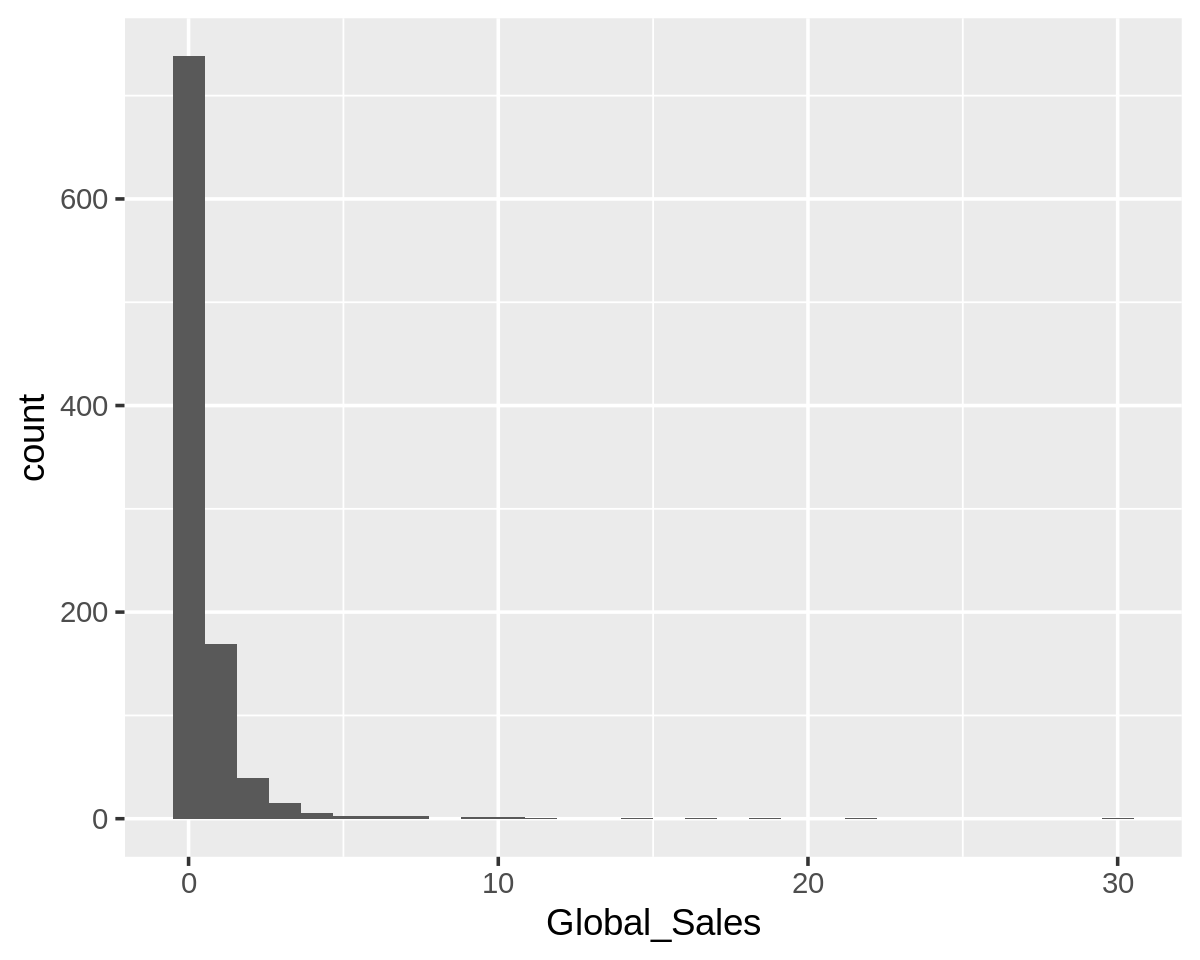

In [39]:
ggplot2::ggplot(dataframe,aes(x=Global_Sales)) +
    ggplot2::geom_histogram()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable></variables><block type="ggplot_plus_R" id="f0V=)as,v1jjFO!?Hbm2" x="-168" y="20"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="^zW1Ig;5_?Rv3a$]58J*"><mutation items="2"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">ggplot</field><data>ggplot2:ggplot</data><value name="ADD0"><block type="variables_get" id="Q(4I~}^z{Sd7V(k`Qmo#"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="LgOm^rV81^.9Tc$BKP~F"><field name="CODE">aes(x=Global_Sales)</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="IGPOGY8;aoB},H#t%nf?"><mutation items="1"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">geom_histogram</field><data>ggplot2:geom_histogram</data></block></value></block></xml>

------------------
**QUESTION:**

Do you think we need to transform `Global_Sales` to make it more normal? Why or why not?

**ANSWER: (click here to edit)**

*Yes, definitely. 
It is very strongly skewed - nowhere near normal. If we leave as is, the residuals for a few data points will more strongly affect later boosted models, which is probably not what we want.*

-------------------

## Prepare train/test sets

Load the `rsample`  package for splitting.

In [40]:
library(rsample)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="~~-I(f=60)#JfKGvV_AP">rsample</variable></variables><block type="import_R" id="aFBwKpYz$V@3rI9Nk71a" x="-280" y="10"><field name="libraryName" id="~~-I(f=60)#JfKGvV_AP">rsample</field></block></xml>

Warning message:
“package ‘rsample’ was built under R version 4.2.2”


The sales variables need to be dropped because they are so strongly correlated with global sales, as is `Rank`.
Do the following:

- Set random seed of 2
- Update the dataframe to have only `Global_Sales`, `Platform`, `Year`, `Genre`, and `Publisher`.
- Square root transform `Global_Sales` with `sqrt(Global_Sales)`
- Transform the character variables to factors
- Split the dataframe  into train/test sets.

In [48]:
base::set.seed(2)

dataframe = dataframe %>%
    dplyr::select(Global_Sales, Platform, Year, Genre, Publisher) %>%
    dplyr::mutate(across(where(is.character), factor)) %>%
    dplyr::mutate(Global_Sales=sqrt(Global_Sales))

data_split = rsample::initial_split(dataframe,prop=.80)
data_train = rsample::training(data_split)
data_test = rsample::testing(data_split)

data_train

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id="bQ!4E:J!~]0(]7KV]m@=">data_split</variable><variable id=":iMr},W7(N7vSLAUw!ao">data_train</variable><variable id="6C!l+@S8,SvtzakmsxQD">base</variable><variable id="~~-I(f=60)#JfKGvV_AP">rsample</variable><variable id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</variable><variable id="|q$XCeTWL%AdgT|]tbnU">data_test</variable></variables><block type="varDoMethod_R" id="bomM2P)~Tr(nEpx?of{1" x="-86" y="-68"><mutation items="1"></mutation><field name="VAR" id="6C!l+@S8,SvtzakmsxQD">base</field><field name="MEMBER">set.seed</field><data>base:set.seed</data><value name="ADD0"><block type="math_number" id="{+E{l0Q?[nEeyJ,jf(v~"><field name="NUM">2</field></block></value></block><block type="variables_set" id="Co@RiNCDY8j:]Qs/E!3H" x="-104" y="72"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field><value name="VALUE"><block type="pipe_R" id="|d#Y|2;I5*NaU}wUKHd:"><mutation items="3"></mutation><value name="INPUT"><block type="variables_get" id="c;NO=v/)yBjzMc[D:woi"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="wyYxMJY?@[Wc|}5QS.)f"><mutation items="1"></mutation><field name="VAR" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field><field name="MEMBER">select</field><data>dplyr:select</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="S!}D:DY7dm)d5iGDcV~:"><field name="CODE">Global_Sales, Platform, Year, Genre, Publisher</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="IR=u^?2?B{VsWIUUzFcH"><mutation items="1"></mutation><field name="VAR" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field><field name="MEMBER">mutate</field><data>dplyr:mutate</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="JDog~z:O6`vNG6P9Eu`1"><field name="CODE">across(where(is.character), factor)</field></block></value></block></value><value name="ADD2"><block type="varDoMethod_R" id="1(I+](3P-h.lf4H{6Djn"><mutation items="1"></mutation><field name="VAR" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field><field name="MEMBER">mutate</field><data>dplyr:mutate</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="]4}Z#t*.q;,a?:g/o4=)"><field name="CODE">Global_Sales=sqrt(Global_Sales)</field></block></value></block></value></block></value></block><block type="variables_set" id="s!g),aa^(]dox/f`@P!y" x="-116" y="313"><field name="VAR" id="bQ!4E:J!~]0(]7KV]m@=">data_split</field><value name="VALUE"><block type="varDoMethod_R" id="hPsr6}9C/VNgaLsKuR,o"><mutation items="2"></mutation><field name="VAR" id="~~-I(f=60)#JfKGvV_AP">rsample</field><field name="MEMBER">initial_split</field><data>rsample:initial_split</data><value name="ADD0"><block type="variables_get" id="]~#@ltf];dTom_%pzV4n"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="R`?vH79hsA6Duxa9)AFX"><field name="CODE">prop=.80</field></block></value></block></value><next><block type="variables_set" id="3J6#JDFV0wE?V;NuM=?L"><field name="VAR" id=":iMr},W7(N7vSLAUw!ao">data_train</field><value name="VALUE"><block type="varDoMethod_R" id="X|Q7lj,pD_9W{%^.xd7h"><mutation items="1"></mutation><field name="VAR" id="~~-I(f=60)#JfKGvV_AP">rsample</field><field name="MEMBER">training</field><data>rsample:training</data><value name="ADD0"><block type="variables_get" id="JFCmHyJPiN`qwnlE~:iT"><field name="VAR" id="bQ!4E:J!~]0(]7KV]m@=">data_split</field></block></value></block></value><next><block type="variables_set" id="Y]ag(g~}tkN6:_X*]6P{"><field name="VAR" id="|q$XCeTWL%AdgT|]tbnU">data_test</field><value name="VALUE"><block type="varDoMethod_R" id="WBYo8G|ZcojJAqETRnv`"><mutation items="1"></mutation><field name="VAR" id="~~-I(f=60)#JfKGvV_AP">rsample</field><field name="MEMBER">testing</field><data>rsample:testing</data><value name="ADD0"><block type="variables_get" id="p^~x9|Zj((6qaUVvj#.E"><field name="VAR" id="bQ!4E:J!~]0(]7KV]m@=">data_split</field></block></value></block></value></block></next></block></next></block><block type="variables_get" id="9j){6[r67+7OFx`a~K[Y" x="-115" y="515"><field name="VAR" id=":iMr},W7(N7vSLAUw!ao">data_train</field></block></xml>

Global_Sales,Platform,Year,Genre,Publisher
<dbl>,<fct>,<dbl>,<fct>,<fct>
0.9433981,GBA,2004,Adventure,Nintendo
1.2247449,NES,1985,Platform,Nintendo
0.8774964,PS2,2001,Platform,Capcom
0.2645751,X360,2015,Action,Ubisoft
0.9000000,PS3,2009,Sports,Electronic Arts
0.1732051,DS,2011,Action,Avanquest
0.2000000,DS,2012,Action,GameMill Entertainment
⋮,⋮,⋮,⋮,⋮
0.5291503,DS,2010,Racing,THQ


## Fit model

Load the model packages `parsnip` and `generics`.

In [49]:
library(parsnip)
library(generics)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="3q]Js%*Alzd]|p|FOe}-">parsnip</variable><variable id="w(9-o9gLSDEJ,]Qt}e!^">generics</variable></variables><block type="import_R" id=")EO_9d*-V8f05GJ8VFM#" x="-219" y="-33"><field name="libraryName" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><next><block type="import_R" id="ygSk4mB:k;Qj4sN*DQ8k"><field name="libraryName" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field></block></next></block></xml>

Warning message:
“package ‘parsnip’ was built under R version 4.2.2”

Attaching package: ‘generics’


The following object is masked from ‘package:dplyr’:

    explain


The following objects are masked from ‘package:base’:

    as.difftime, as.factor, as.ordered, intersect, is.element, setdiff,
    setequal, union




Since the response/target variable is numeric, we need to use a gradient boosting regressor rather than a classifier.

Create and fit the gradient boosting regressor to predict `Global_Sales`.

In [50]:
model = parsnip::boost_tree() %>%
    parsnip::set_mode("regression") %>%
    parsnip::set_engine("xgboost") %>%
    parsnip::fit.model_spec(Global_Sales ~ .,data = data_train)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="X7gn=SG]z:rF):bD*t9f">model</variable><variable id="3q]Js%*Alzd]|p|FOe}-">parsnip</variable></variables><block type="variables_set" id="*(u89h_-M@(PB-!qP/1l" x="-94" y="176"><field name="VAR" id="X7gn=SG]z:rF):bD*t9f">model</field><value name="VALUE"><block type="pipe_R" id="Oj1:/l+xksT^dSM;w{,g"><mutation items="3"></mutation><value name="INPUT"><block type="varDoMethod_R" id="m!?PwvZD%AJHhH1paJ[8"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">boost_tree</field><data>parsnip:boost_tree</data></block></value><value name="ADD0"><block type="varDoMethod_R" id="ady`8N}J*2BV_*AmtF`n"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">set_mode</field><data>parsnip:set_mode</data><value name="ADD0"><block type="text" id="#4#x{=R9!%aA:_,cHnF("><field name="TEXT">regression</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="bybPF(gahfhB3cmyy;/n"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">set_engine</field><data>parsnip:set_engine</data><value name="ADD0"><block type="text" id="v9=Ry*6UUQjzFr5Sy@,f"><field name="TEXT">xgboost</field></block></value></block></value><value name="ADD2"><block type="varDoMethod_R" id="Q61XWF.0ty]Aw^i83YUS"><mutation items="2"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">fit.model_spec</field><data>parsnip:fit.model_spec</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="n(du-Q]_KTwoCFj6n|V5"><field name="CODE">Global_Sales ~ .</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="lIU{_ql0epb7NH-C6Kvw"><field name="CODE">data = data_train</field></block></value></block></value></block></value></block></xml>

Get predictions to evaluate the model on the training set and test set.

In [52]:
data_evaluation_test = generics::augment(model,data_test)

data_evaluation_train = generics::augment(model,data_train)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="e2B,Bu(jQt3Y,cQat)yU">data_evaluation_test</variable><variable id="R$)A!ZMF~.ASeHv_!Tfa">data_evaluation_train</variable><variable id="w(9-o9gLSDEJ,]Qt}e!^">generics</variable><variable id="X7gn=SG]z:rF):bD*t9f">model</variable><variable id="|q$XCeTWL%AdgT|]tbnU">data_test</variable><variable id=":iMr},W7(N7vSLAUw!ao">data_train</variable></variables><block type="variables_set" id="qHR/^ulVJ-n)W4{:7-@Y" x="-194" y="111"><field name="VAR" id="e2B,Bu(jQt3Y,cQat)yU">data_evaluation_test</field><value name="VALUE"><block type="varDoMethod_R" id="k:ygkKz,swERp]34_uH{"><mutation items="2"></mutation><field name="VAR" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><field name="MEMBER">augment</field><data>generics:augment</data><value name="ADD0"><block type="variables_get" id="9A!7aBLNe1]IufZ-R;BY"><field name="VAR" id="X7gn=SG]z:rF):bD*t9f">model</field></block></value><value name="ADD1"><block type="variables_get" id="qPW(v;lbSJ=RJ)y;hW$)"><field name="VAR" id="|q$XCeTWL%AdgT|]tbnU">data_test</field></block></value></block></value></block><block type="variables_set" id="A[qW_Iaj=5DBXOSRmoBm" x="-167" y="199"><field name="VAR" id="R$)A!ZMF~.ASeHv_!Tfa">data_evaluation_train</field><value name="VALUE"><block type="varDoMethod_R" id="X,[r`3]Pj+%GK?ui#[x]"><mutation items="2"></mutation><field name="VAR" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><field name="MEMBER">augment</field><data>generics:augment</data><value name="ADD0"><block type="variables_get" id="M82lI`aE2+xGN1ZWzO]8"><field name="VAR" id="X7gn=SG]z:rF):bD*t9f">model</field></block></value><value name="ADD1"><block type="variables_get" id="mA[IcM.LM4EE0.M$=qR:"><field name="VAR" id=":iMr},W7(N7vSLAUw!ao">data_train</field></block></value></block></value></block></xml>

## Evaluate the model

Load `yardstick`.

In [53]:
library(yardstick)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="M8O}^6C_fm;DGZt9!{=e">yardstick</variable></variables><block type="import_R" id="~]m5/PaJhO^)r2YX)!Ko" x="-152" y="-34"><field name="libraryName" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field></block></xml>

For binary classification, the first factor level is assumed to be the event.
Use the argument `event_level = "second"` to alter this as needed.


Attaching package: ‘yardstick’


The following object is masked from ‘package:generics’:

    accuracy


The following object is masked from ‘package:readr’:

    spec




Get the $r^2$ on the *training* set.

In [54]:
yardstick::metrics(data_evaluation_train,truth=Global_Sales,estimate=.pred)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="M8O}^6C_fm;DGZt9!{=e">yardstick</variable><variable id="R$)A!ZMF~.ASeHv_!Tfa">data_evaluation_train</variable></variables><block type="varDoMethod_R" id="}8geyZsnB:m(rnE@BXP4" x="-195" y="-31"><mutation items="3"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">metrics</field><data>yardstick:metrics</data><value name="ADD0"><block type="variables_get" id="inmIR9?rqp!YnwHez%@4"><field name="VAR" id="R$)A!ZMF~.ASeHv_!Tfa">data_evaluation_train</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="u2{8ROf2$M*e:q+2d_B_"><field name="CODE">truth=Global_Sales</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="V64;DP@:{*g?Nq4tPQ0^"><field name="CODE">estimate=.pred</field></block></value></block></xml>

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.3236228
rsq,standard,0.6457212
mae,standard,0.2271250


Get the $r^2$ on the *testing* set.

In [55]:
yardstick::metrics(data_evaluation_test,truth=Global_Sales,estimate=.pred)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="M8O}^6C_fm;DGZt9!{=e">yardstick</variable><variable id="e2B,Bu(jQt3Y,cQat)yU">data_evaluation_test</variable></variables><block type="varDoMethod_R" id="}8geyZsnB:m(rnE@BXP4" x="-195" y="-31"><mutation items="3"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">metrics</field><data>yardstick:metrics</data><value name="ADD0"><block type="variables_get" id="inmIR9?rqp!YnwHez%@4"><field name="VAR" id="e2B,Bu(jQt3Y,cQat)yU">data_evaluation_test</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="u2{8ROf2$M*e:q+2d_B_"><field name="CODE">truth=Global_Sales</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="V64;DP@:{*g?Nq4tPQ0^"><field name="CODE">estimate=.pred</field></block></value></block></xml>

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.6105623
rsq,standard,0.1401891
mae,standard,0.3402071


------------------
**QUESTION:**

Compare the *training data performance* to the *testing data performance*. Which is better?
What do these differences tell you?

**ANSWER: (click here to edit)**

*The training data performance is OK, not amazing, and the test data performance is absolutely terrible.
This suggests that perhaps the model is overfit.*

-------------------

## Visualizing

Load the library for variable importance plotting, `vip`.

In [56]:
library(vip)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="c4,$E5ds_w1W+q{o37kD">vip</variable></variables><block type="import_R" id=".,htgyb1haPTlzC;l0r(" x="-203" y="-207"><field name="libraryName" id="c4,$E5ds_w1W+q{o37kD">vip</field></block></xml>


Attaching package: ‘vip’


The following object is masked from ‘package:utils’:

    vi




Plot the importances.

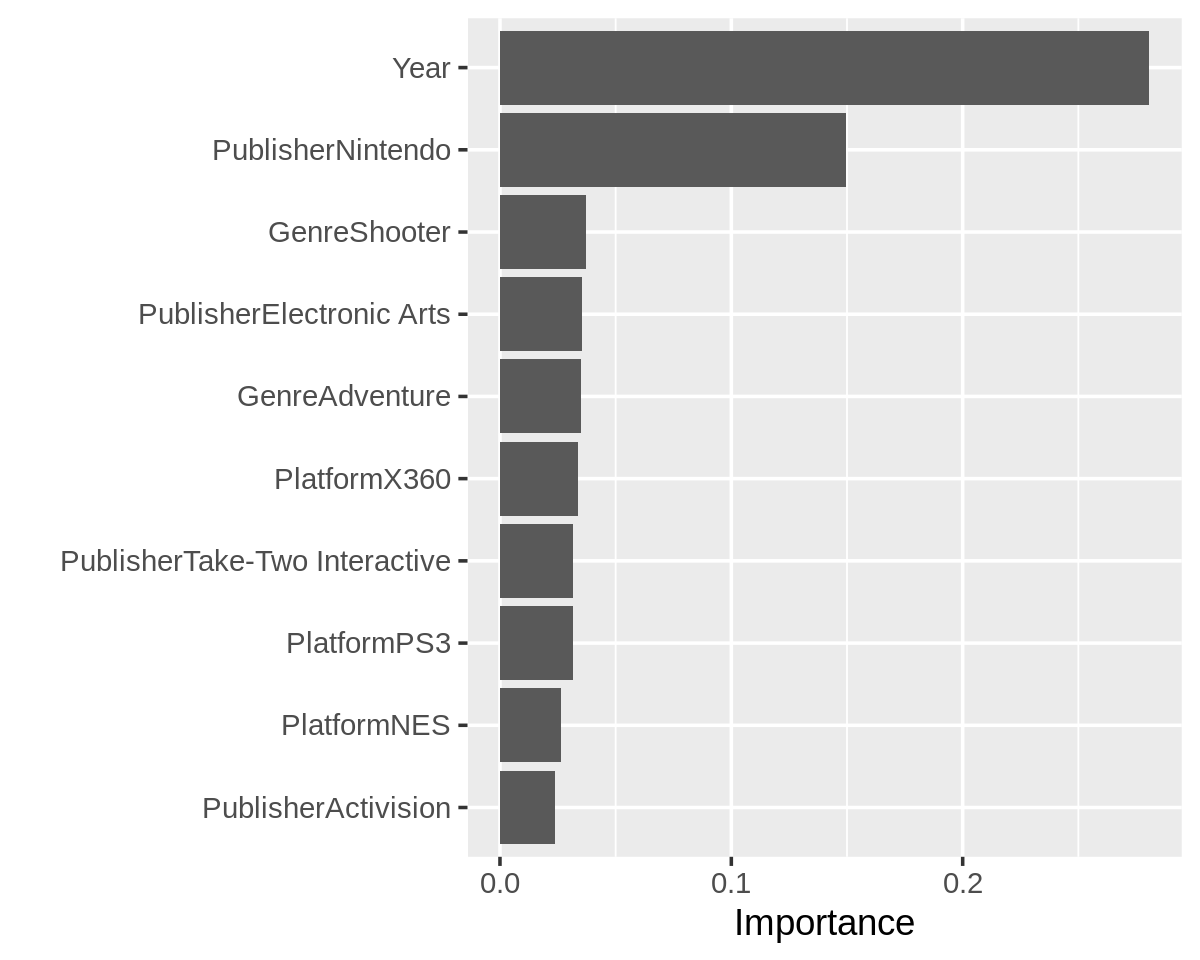

In [57]:
vip(model,num_features = 10)

#<xml xmlns="https://developers.google.com/blockly/xml"><block type="dummyOutputCodeBlock_R" id="@nIf.I(F,$RV,eay2fk`" x="-58" y="-112"><field name="CODE">vip(model,num_features = 10)</field></block></xml>

------------------
**QUESTION:**

What are the most important features?

**ANSWER: (click here to edit)**

*`Year` and `Nintendo` are the most important by far.
X360, PS3, NES platforms and Shooter/Adventure games are important, and other publishers `Activision`, `Electronic Arts`, and `Take Two Interactive` are also important.*

-------------------

<!-- TODO: xgboost doesn't have the OOB calculations required to translate the below from python to R.

### Overfit

Use the OOB error to test if the model is overfit.

Import `plotly.graph_objects`

import plotly.graph_objects as go

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="/S5EHzNl)/I50f/-KSZQ">go</variable></variables><block type="importAs_Python" id="WV{jUj%W/=n1;iRGdHoh" x="21" y="-12"><field name="libraryName">plotly.graph_objects</field><field name="libraryAlias" id="/S5EHzNl)/I50f/-KSZQ">go</field></block></xml>

Create an empty figure to draw lines on.

fig = go.Figure()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="FuH.yx^v|kVlL!174TwM">fig</variable><variable id="/S5EHzNl)/I50f/-KSZQ">go</variable></variables><block type="variables_set" id="/0h?*zn[*5v^D?X%MQok" x="75" y="137"><field name="VAR" id="FuH.yx^v|kVlL!174TwM">fig</field><value name="VALUE"><block type="varCreateObject_Python" id="ccYq?D6[iomaxyAzJK/^"><field name="VAR" id="/S5EHzNl)/I50f/-KSZQ">go</field><field name="MEMBER">Figure</field><data>go:Figure</data></block></value></block></xml>

And add the two lines, one for training deviance and one for testing deviance.

fig.add_scatter(x=np.arange(0,100), y=gradientBoostingRegressor.train_score_, name="Training Deviance")

fig.add_scatter(x=np.arange(0,100), y=gradientBoostingRegressor.oob_improvement_, name="Testing Deviance")

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="FuH.yx^v|kVlL!174TwM">fig</variable></variables><block type="varDoMethod_Python" id="t+LX0/GT`Qh5{V)D|_Do" x="8" y="108"><field name="VAR" id="FuH.yx^v|kVlL!174TwM">fig</field><field name="MEMBER">add_scatter</field><data>fig:add_scatter</data><value name="INPUT"><block type="lists_create_with" id="$P.j=XWx|B{Y).~[lezc"><mutation items="3"></mutation><value name="ADD0"><block type="dummyOutputCodeBlock_Python" id="Hwlm,itF~DgkC;2v8pR#"><field name="CODE">x=np.arange(0,100)</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_Python" id="?Vn@H0+:Y,rip,w8aKf2"><field name="CODE">y=gradientBoostingRegressor.train_score_</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_Python" id="GJ2OO1n10FnddKV3eGZ)"><field name="CODE">name="Training Deviance"</field></block></value></block></value></block><block type="varDoMethod_Python" id="%th4!T:T(hpvb_^]Me[#" x="15" y="192"><field name="VAR" id="FuH.yx^v|kVlL!174TwM">fig</field><field name="MEMBER">add_scatter</field><data>fig:add_scatter</data><value name="INPUT"><block type="lists_create_with" id="JUgueIjO?}v?1eij{k0H"><mutation items="3"></mutation><value name="ADD0"><block type="dummyOutputCodeBlock_Python" id="@pg^4a/R,=aqA`%8At`r"><field name="CODE">x=np.arange(0,100)</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_Python" id=",KXsqS*+JycIh?{g;`vQ"><field name="CODE">y=gradientBoostingRegressor.oob_improvement_</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_Python" id="B5jcBj.Fhb9nYG#1H/]z"><field name="CODE">name="Testing Deviance"</field></block></value></block></value></block></xml>

------------------
**QUESTION:**

Do you think it would help our test data performance if we stopped training earlier? Why?

**ANSWER: (click here to edit)**

*Possibly around 4 or 5, thought test data performance seems bad all the way around.*

-------------------

**QUESTION:**

Now that you are familiar with this data and how gradient boosting performed with it, what other models would you try?

**ANSWER: (click here to edit)**

*Given how strong `Year` is, I'd probably consider linear regression using `Year` as a baseline model and then add the genre and publisher features.*

------------------- -->